In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

data = pd.read_csv("Birthweight.csv")

Середній вік:  26


<AxesSubplot:xlabel='mage', ylabel='Count'>

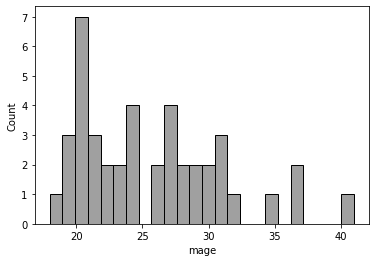

In [2]:
# 1. Знайти середній вік матерів.
mean_age = round(np.mean(data['mage']))
print("Середній вік: ", mean_age)
sns.histplot(data['mage'], color="grey", element="bars", bins=(np.max(data['mage']) - np.min(data['mage']) + 1))

pvalue: 0.9488996378374451
Приймаємо основну гіпотезу: вага дітей нормально розподілена


<AxesSubplot:xlabel='Birthweight', ylabel='Count'>

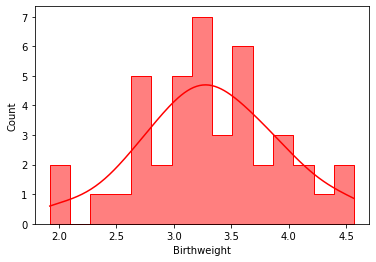

In [3]:
# 2. Перевірити чи нормально розподілена вага дітей
child_weight = data['Birthweight']

#H0: вага дітей нормально розподілена
#H1: вага дітей не має нормального розподілу
#Використовуємо рівень значущості alpha = 0.05

result = scipy.stats.normaltest(child_weight)
print("pvalue:",result.pvalue)
if result.pvalue < 0.05:
    print("Приймаємо альтернативну гіпотезу і відхиляємо H0: вага дітей не має нормального розподілу")
else:
    print("Приймаємо основну гіпотезу: вага дітей нормально розподілена")


sns.histplot(child_weight, kde=True, color="red", element="step", bins=15)

pvalue: 0.021348123272796834
Приймаємо основну гіпотезу: у матерів, що палять, легші діти


<AxesSubplot:xlabel='Birthweight', ylabel='Count'>

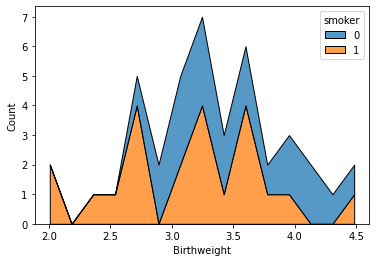

In [9]:
# 3. Перевірити чи у матерів, що палять, легші діти.

child_smokers = data[data['smoker'] == 1]['Birthweight']
child_nonsmokers = data[data['smoker'] == 0]['Birthweight']

#H0: у матерів, що палять, легші діти, ніж діти у яких матері не палять
#H1: у матерів, що палять, діти не легші, ніж діти у яких матері не палять
#Використовуємо рівень значущості alpha = 0.05

result = scipy.stats.ttest_ind(child_smokers, child_nonsmokers, alternative='less')

print("pvalue:",result.pvalue)
if result.pvalue < 0.05:
    print("Приймаємо альтернативну гіпотезу і відхиляємо H0: у матерів, що палять, діти не легші")
else:
    print("Приймаємо основну гіпотезу: у матерів, що палять, легші діти")
    
sns.histplot(data, x="Birthweight", hue="smoker", multiple="stack", element="poly", bins=15)

array([[ 8.61788618,  9.2601626 ],
       [ 9.2601626 , 42.30255517]])

(0.48499240263265075, 0.0011331311458135556)

0.4553274463786581

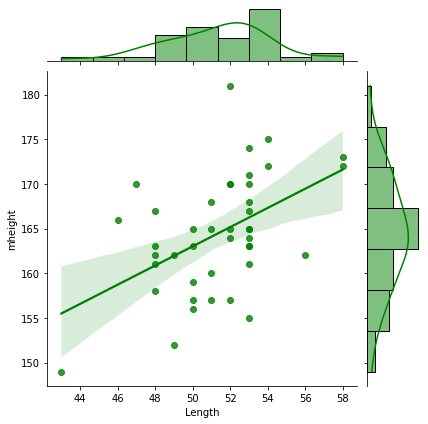

In [5]:
# 4. Чи є зв’язок між зростом матері та дитини?
child_height = data['Length']
mother_heihgt = data['mheight']

covariance = np.cov(child_height, mother_heihgt)
pearsons_corr = scipy.stats.pearsonr(child_height, mother_heihgt)
spearman_corr = scipy.stats.spearmanr(child_height, mother_heihgt).correlation
display(covariance, pearsons_corr, spearman_corr)

#Маємо дуже низькі результати, тому можна зробити висновок, що зріст матері та дитини дуже слабо пов'язані

#Можемо побачити графік відношення зросту дітей до зросту їх матерей
sns.jointplot(x='Length', y='mheight', data=data, kind='reg', color="green")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41d21095-808e-4654-a83b-3b85aff35b7d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>